In [2]:
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [164]:
#hist_path = "file_dict_before_tunedBtag/ttZ_2018.root"
hist_path = "file_dict/ttZ_2016.root"

### Search Engine

In [136]:
my_key_query = ["*trileptonmass*Fake*"]
key_list     = uproot.open(f'{hist_path}').keys(filter_name=my_key_query)
key_list

['ttZ_ttZ_trileptonmass_FakeLep_None;1',
 'ttZ_ttZ_trileptonmass_FakeLep_fakerate_18Up;1',
 'ttZ_ttZ_trileptonmass_FakeLep_fakerate_18Down;1',
 'ttZ_ttZ_trileptonmass_FakeLep_fakerate_18SysUp;1',
 'ttZ_ttZ_trileptonmass_FakeLep_fakerate_18SysDown;1']

In [76]:
process_list = ["VG","VV","VVV","Top","WZG"]
weight_uncorr = ["btagWeight_l_uncorr_18Up","btagWeight_l_uncorr_18Down"]
weight_corr = ["btagWeight_l_corrUp","btagWeight_l_corrDown"]

In [121]:
def get_hist(weight_corr,process):

    key_unc_string_up   = f"ttZ_ttZ_trileptonmass_{process}_{weight_uncorr[0]}"
    key_unc_string_down = f"ttZ_ttZ_trileptonmass_{process}_{weight_uncorr[1]}"
    key_nom_string      = f"ttZ_ttZ_trileptonmass_{process}_None"

    hist_nom = uproot.open(f'{hist_path}')[key_nom_string].to_boost()
    hist_up  = uproot.open(f'{hist_path}')[key_unc_string_up].to_boost()
    hist_down= uproot.open(f'{hist_path}')[key_unc_string_down].to_boost()
    return hist_nom,hist_up,hist_down

In [ ]:
['ttZ_ttZ_trileptonmass_FakeLep_None;1',
 'ttZ_ttZ_trileptonmass_FakeLep_fakerate_18Up;1',
 'ttZ_ttZ_trileptonmass_FakeLep_fakerate_18Down;1',
 'ttZ_ttZ_trileptonmass_FakeLep_fakerate_18SysUp;1',
 'ttZ_ttZ_trileptonmass_FakeLep_fakerate_18SysDown;1']

In [165]:
key_nom_string          = 'ttZ_ttZ_trileptonmass_FakeLep_None;1'
key_stat_string_up      = 'ttZ_ttZ_trileptonmass_FakeLep_fakerate_16Up;1'
key_stat_string_down    ='ttZ_ttZ_trileptonmass_FakeLep_fakerate_16Down;1'
key_sys_string_up       ='ttZ_ttZ_trileptonmass_FakeLep_fakerate_16SysUp;1'
key_sys_string_down     ='ttZ_ttZ_trileptonmass_FakeLep_fakerate_16SysDown;1'

In [166]:
hist_nom = uproot.open(f'{hist_path}')[key_nom_string].to_boost()
hist_up  = uproot.open(f'{hist_path}')[key_sys_string_up].to_boost()
hist_down= uproot.open(f'{hist_path}')[key_sys_string_down].to_boost()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mplhep\utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mplhep\utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mplhep\utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


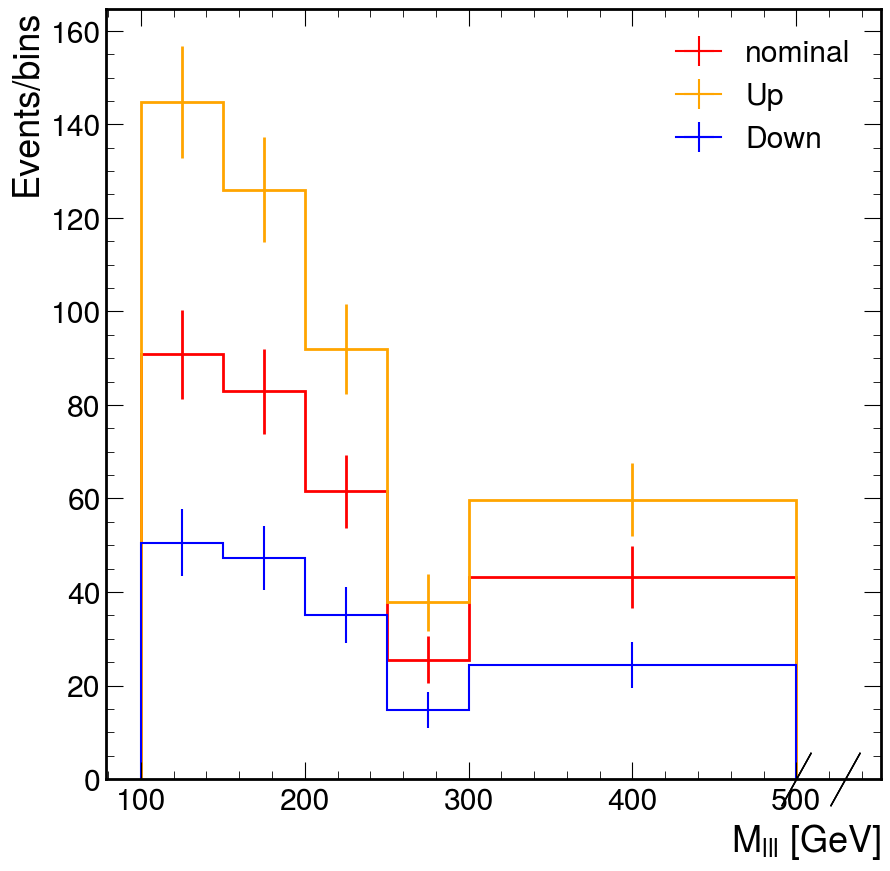

In [167]:
draw_hist(hist_nom,hist_up,hist_down)

In [123]:
import mplhep as hep

In [124]:
def draw_hist(hist_sum_nom,hist_sum_up,hist_sum_down):
    plt.close()
    plt.figure(figsize=(10,10))
    plt.style.use(hep.style.CMS)
    hep.histplot(hist_sum_nom,color='r',linewidth=2,label="nominal")
    hep.histplot(hist_sum_up,color='orange',linewidth=2,label="Up")
    hep.histplot(hist_sum_down,color='b',label="Down")
    plt.legend()
    plt.xlabel("$M_{lll}$ [GeV]")
    plt.ylabel("Events/bins")
    plt.show()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mplhep\utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mplhep\utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mplhep\utils.py:194: RuntimeWarning: invalid value encountered in sqrt
  return values - np.sqrt(values), values + np.sqrt(values)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Pytho

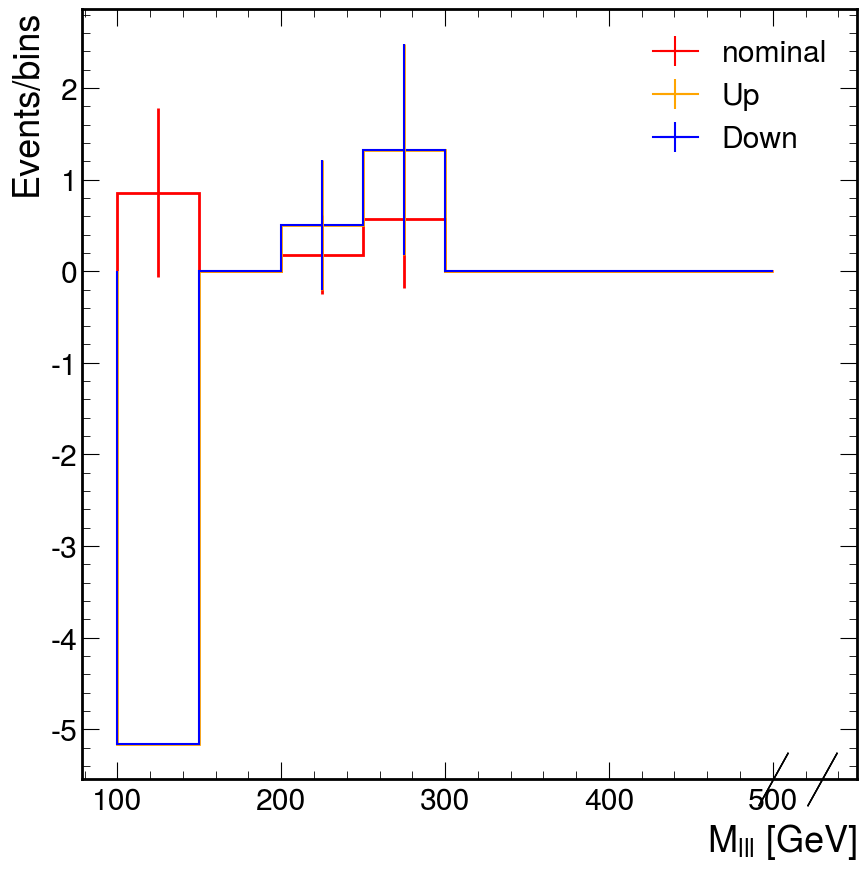

In [128]:
draw_hist(*get_hist(weight_corr,'VG'))